Team 2!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv')
X = feature.values # [Length1, Length2, Length3, Height, Width]
y = label.values    #[Weight]

In [ ]:
''' 
The test set will be released on Sunday night
'''
X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_label.csv').values

In [ ]:
# 0. Remove missing values (by checking the shapes we found that there weren't any, but it's good practice to check)

feature = feature.dropna()
label = label.dropna()

print(f"The shape of the features is {feature.shape} and the shape of labels is {label.shape}.")

The shape of the features is (124, 5) and the shape of labels is (124, 1).


   Length1  Length2  Length3   Height   Width
0     11.7     12.4     13.5   2.4300  1.2690
1     19.0     20.7     23.2   9.3960  3.4104
2     38.0     41.0     46.5  17.6235  6.3705

---------------------

 Blue points: Length1 
 Orange points: Length2 
 Green points: Length3 
 Red points: Height 
 Purple points: Width 



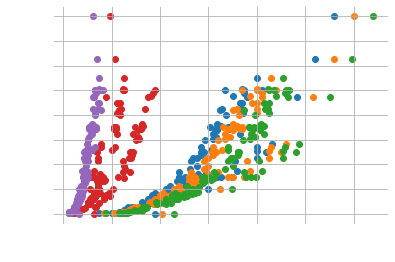

In [ ]:
# 1. Graph/plot the data (includes training and validation data)

print(feature.head(3))
print("\n---------------------")

X_1 = X[:,0]
X_2 = X[: ,1]
X_3 = X[: ,2]
X_4 = X[: ,3]
X_5 = X[: ,4]

plt.scatter(X_1,y)
plt.xlabel('Features')
plt.ylabel('labels/weight')
plt.grid()

plt.scatter(X_2,y)
plt.ylabel('labels/weight')
plt.grid()

plt.scatter(X_3,y)
plt.ylabel('labels/weight')
plt.grid()

plt.scatter(X_4,y)
plt.ylabel('labels/weight')
plt.grid()

plt.scatter(X_5,y)
plt.ylabel('labels/weight')
plt.grid()

print("\n Blue points: Length1 \n Orange points: Length2 \n Green points: Length3 \n Red points: Height \n Purple points: Width \n")

In [ ]:
# 2. Create training & validation set
import sklearn.model_selection as ms
X_train, X_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.5, random_state=42)
# we chose 0.5 by brute force because weirdly enough the larger the validation set, the lower the MSE/MAE on our val set (no matter the random_state)

print(f"X (features) training set shape: {X_train.shape}")
print(f"Y (labels) training set shape: {y_train.shape} \n")
print(f"X (features) validation set shape: {X_val.shape}")
print(f"Y (labels) validation set shape: {y_val.shape}")

X (features) training set shape: (62, 5)
Y (labels) training set shape: (62, 1) 

X (features) validation set shape: (62, 5)
Y (labels) validation set shape: (62, 1)


In [ ]:
# MSE and MAE
def MSE(y, yhat):
  ''' Returns the MSE of two numpy arrays
  type y: numpy.array()
  type yhat: numpy.array()
  return type: int/float '''
  return np.mean((yhat.reshape((-1, 1)) - y.reshape((-1, 1))) ** 2)

def MAE(y, yhat):
  ''' Returns the MAE of two numpy arrays
  type y: numpy.array()
  type yhat: numpy.array()
  return type: int/float '''
  return np.mean(np.abs(yhat.reshape((-1, 1)) - y.reshape((-1, 1))))

In [ ]:
# Another way to remove the negative values (produces lower MSEs & MAEs)

def removeNeg(yhat):

  '''Sets all of the negative values
  in a dataset to zero to minimize MSE & MAE
  type yhat: list
  return type: list'''

  for i in range(len(yhat)):
    if yhat[i] < 0:
      yhat[i] = 0

  return yhat

In [ ]:
# Set up a Ridge Model
from sklearn.linear_model import Ridge

# Arrays to store the MSE for each value of a
train_MSE_ridge = []
val_MSE_ridge = []

alphas_ridge = np.arange(200, 0, -.01)
ridge = Ridge(fit_intercept=True)

for a in alphas_ridge:
  ridge.set_params(alpha=a) # Set up the model with the current alpha value
  ridge.fit(X_train, y_train) # Fit the model to the training data
  yhat_train = ridge.predict(X_train) # Predict for the training data
  yhat_val = ridge.predict(X_val) # Predict for the validation data

  train_MSE_ridge.append(np.mean((yhat_train - y_train) ** 2))
  val_MSE_ridge.append(MSE(y_val, yhat_val))

index_best_alpha_ridge = np.argmin(val_MSE_ridge)
best_alpha_ridge = alphas_ridge[index_best_alpha_ridge]
print(f"Best Alpha Value: {best_alpha_ridge}")
print(f"Minimum MSE: {val_MSE_ridge[index_best_alpha_ridge]}")
print(f"Minimum MSE for training: {train_MSE_ridge[index_best_alpha_ridge]}")
print(f"Minimum MAE: {MAE(y_val, yhat_val)}")
print(f"Minimum MAE for training: {MAE(y_train, yhat_train)}")

print("\nafter removing negatives...")
yhat_train = removeNeg(yhat_train)
yhat_val = removeNeg(yhat_val)
print(f"MSE training: {MSE(y_train, yhat_train)}")
print(f"MSE validation: {MSE(y_val, yhat_val)}")

w = ridge.coef_
print(f"w: {w}")

Best Alpha Value: 19.200000000164437
Minimum MSE: 20878.455641798482
Minimum MSE for training: 7803.972307055852
Minimum MAE: 101.43910597910666
Minimum MAE for training: 67.60309004036631

after removing negatives...
MSE training: 4828.4217404800465
MSE validation: 20436.063350071952
w: [[ 68.30020324 -33.39490649 -22.14501489  22.93115821  97.01752962]]


In [ ]:
# Set up a Lasso Model
from sklearn.linear_model import Lasso

# Arrays to store the MSE for each value of a
train_MSE_lasso = []
val_MSE_lasso = []

alphas_lasso = np.arange(100, 0.1, -.1)
lasso = Lasso(fit_intercept=True, random_state=42, max_iter = 40000)

for a in alphas_lasso:
  lasso.set_params(alpha = a)
  lasso.fit(X_train, y_train) # Fit the model to the training data
  yhat_train = lasso.predict(X_train) # Predict for the training data
  yhat_val = lasso.predict(X_val) # Predict for the validation data

  train_MSE_lasso.append(MSE(y_train, yhat_train))
  val_MSE_lasso.append(MSE(y_val, yhat_val))

print(val_MSE_lasso)
index_best_alpha_lasso = np.argmin(val_MSE_lasso)
best_alpha_lasso = alphas_lasso[index_best_alpha_lasso]
print(f"Best Alpha Value: {best_alpha_lasso}")
print(f"Minimum MSE: {val_MSE_lasso[index_best_alpha_lasso]}")
print(f"Minimum MSE for training: {train_MSE_lasso[index_best_alpha_lasso]}")


w = lasso.coef_
print(f"w: {w}")

[24757.393146000366, 24755.491734309202, 24753.591507593024, 24751.13610380894, 24749.16483856068, 24747.259230685715, 24745.36440980794, 24743.470766333256, 24741.578323249123, 24739.102972795212, 24737.161863344063, 24735.273606352956, 24733.386547556835, 24731.500661559025, 24729.61597425484, 24727.114984759617, 24725.219269084148, 24723.338764583, 24721.459441646195, 24719.581308708108, 24717.122725529825, 24715.20132435502, 24713.3273713765, 24711.45459608014, 24709.583013435193, 24707.712603655593, 24705.219725854, 24703.35232161157, 24701.486090266277, 24699.62104195103, 24697.757179702232, 24695.294920486962, 24693.41356866803, 24691.553883290733, 24689.69537084341, 24687.83803132603, 24685.403879847414, 24683.511100442065, 24681.65793689376, 24679.805954140375, 24677.955157841134, 24675.544525460435, 24673.644865001672, 24671.798233898102, 24669.95278499172, 24668.108509079902, 24666.265406162573, 24663.814856337875, 24661.97475391964, 24660.135824527777, 24658.29806816229, 24

In [ ]:
# Print out what the model computes using the ridge model

ridge.set_params(alpha = best_alpha_ridge)
ridge.fit(X_train, y_train)
yhat_test = ridge.predict(X_test) # This will predict for the test data (yet to be released)

print(f"MSE: {MSE(y_test, yhat_test)}")
print(f"MAE: {MAE(y_test, yhat_test)}")

MSE: 11805.51507597222
MAE: 85.0328371877648


In [ ]:
# UPDATED 08/10: Model performance on test data after setting negative weight values to 0:

yhat_test[yhat_test < 0] = 0

print(f"new MSE: {MSE(y_test, yhat_test)}")
print(f"new MAE: {MAE(y_test, yhat_test)}")

new MSE: 8937.691782183409
new MAE: 69.00127969819499


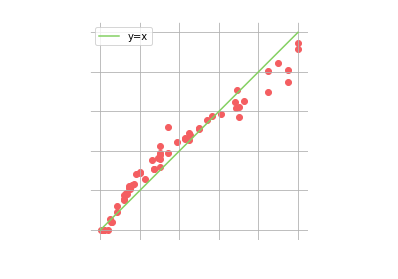

In [ ]:
#graph scatter plot of the real result vs our prediction (training data):
yhat_train = removeNeg(yhat_train)
y_train = removeNeg(y_train)
plt.scatter(y_train,yhat_train, color = '#F45E61')
plt.grid()

#graph a y=x line:
x_line = np.linspace(0,1000,10)
y_line = x_line
plt.plot(x_line, y_line, color = '#83D061', label = "y=x")

#graph labels:
plt.legend()
plt.axis('square')
plt.title('Real Training Data Labels vs Our Predicted Training Data Labels', color = 'white')
plt.xlabel('Real labels (y_train)', color = 'white')
plt.ylabel('Predicted labels (yhat_train)', color = 'white')
plt.show()

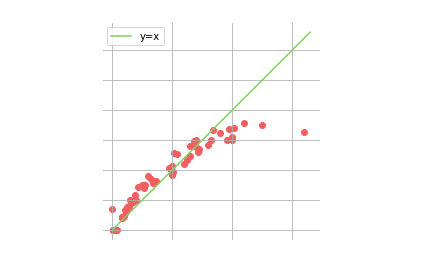

In [ ]:
#graph scatter plot of the real result vs our prediction (validation data):
yhat_val = removeNeg(yhat_val)
y_val = removeNeg(y_val)
plt.scatter(y_val,yhat_val, color = '#F45E61')
plt.grid()

#graph a y=x line:
x_line = np.linspace(0,1650,10)
y_line = x_line
plt.plot(x_line, y_line, color = '#83D061', label = "y=x")

#graph labels:
plt.legend()
plt.axis('square')
plt.title('Real Validation Data Labels vs Our Predicted Validation Data Labels', color = 'white')
plt.xlabel('Real labels (y_val)', color = 'white')
plt.ylabel('Predicted labels (yhat_val)', color = 'white')
plt.show()

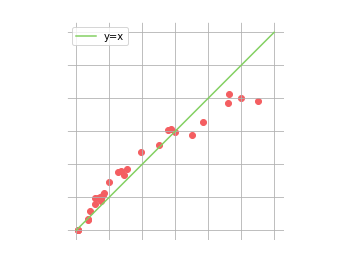

In [ ]:
#graph scatter plot of the real result vs our prediction (test data):
yhat_test = removeNeg(yhat_test)
y_test = removeNeg(y_test)
plt.scatter(y_test,yhat_test, color = '#F45E61')
plt.grid()

#graph a y=x line:
x_line = np.linspace(0,1200,10)
y_line = x_line
plt.plot(x_line, y_line, color = '#83D061', label = "y=x")

#graph labels:
plt.legend()
plt.axis('square')
plt.title('Real Test Data Labels vs Our Predicted Test Data Labels', color = 'white')
plt.xlabel('Real labels (y_test)', color = 'white')
plt.ylabel('Predicted labels (yhat_test)', color = 'white')
plt.show()